In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"

In [3]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

In [5]:
dataset_dir = '/content/final_antispoofing'
train_dataset_dir = '/content/final_antispoofing/train'
test_dataset_dir = '/content/final_antispoofing/test'

In [6]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [7]:
train_dir='/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

In [8]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [10]:
train_test_splits(data_directory=dataset_dir)

In [11]:
categories = ['real','spoof']

In [12]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


In [13]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [14]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [15]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/WIN_20201110_13_21_17_Pro.jpg', '/content/antispoofing_dataset/train/real/20201110_113513.jpg', '/content/antispoofing_dataset/train/real/jfdhfjhsdjf38.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_22_54_Probrightness1.27.jpg', '/content/antispoofing_dataset/train/real/Sudeep Subedi8.jpg', '/content/antispoofing_dataset/train/real/cxvffhgduyguj34.jpg', '/content/antispoofing_dataset/train/real/rftfyhbjnk35.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal24hr_flip.jpg', '/content/antispoofing_dataset/train/real/Samir tamang36.jpg', '/content/antispoofing_dataset/train/real/Rijan Ale31.jpg', '/content/antispoofing_dataset/train/real/dfjksjf45.jpg', '/content/antispoofing_dataset/train/real/Prabhat Ale11.jpg', '/content/antispoofing_dataset/train/real/WIN_20201119_10_49_22_Pro.jpg', '/content/antispoofing_dataset/train/real/Salina Xetri27.jpg', '/content/antispoofing_dataset/train/real/ghjknhgj38.jpg', '/content/anti

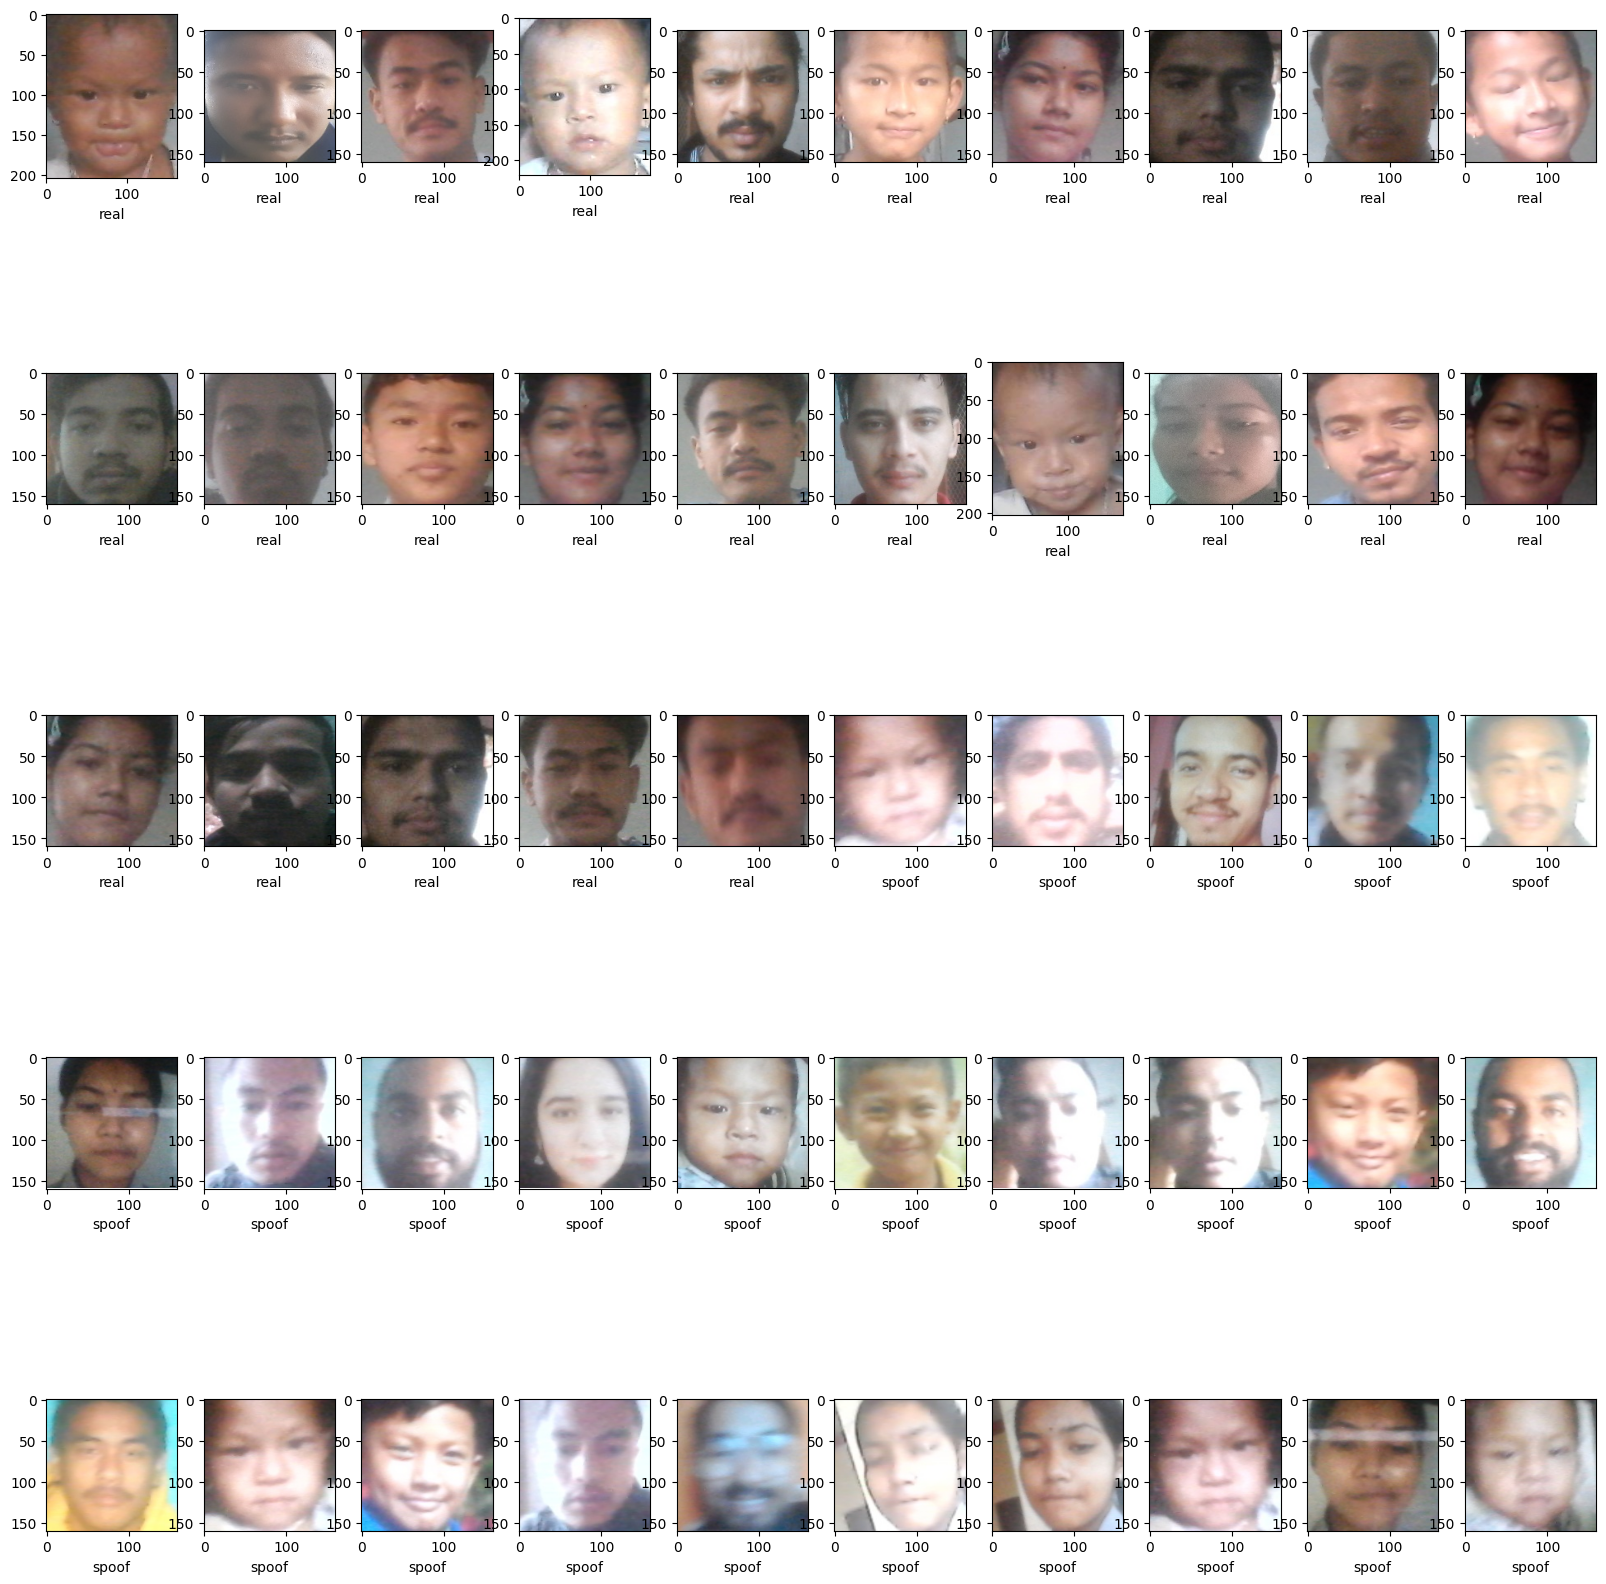

In [16]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

In [18]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/WIN_20201110_13_21_17_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/fjdkjk23.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_13_23_35_Pro (2)hr_flip.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_10_06_14_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/Prabhat Ale11.jpg', '/content/antispoofing_dataset/test/real/Suraj Khanal34.jpg', '/content/antispoofing_dataset/test/real/hehehe8.jpg', '/content/antispoofing_dataset/test/real/rftfyhbjnk24.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi32brightness0.57.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi30brightness0.75.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam4hr_flipbrightness1.31.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_10_08_29_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/samir ale gurung46.jpg', '/content/antispoofing_dataset/test/real/received_663513861195964hr_flip.jpg

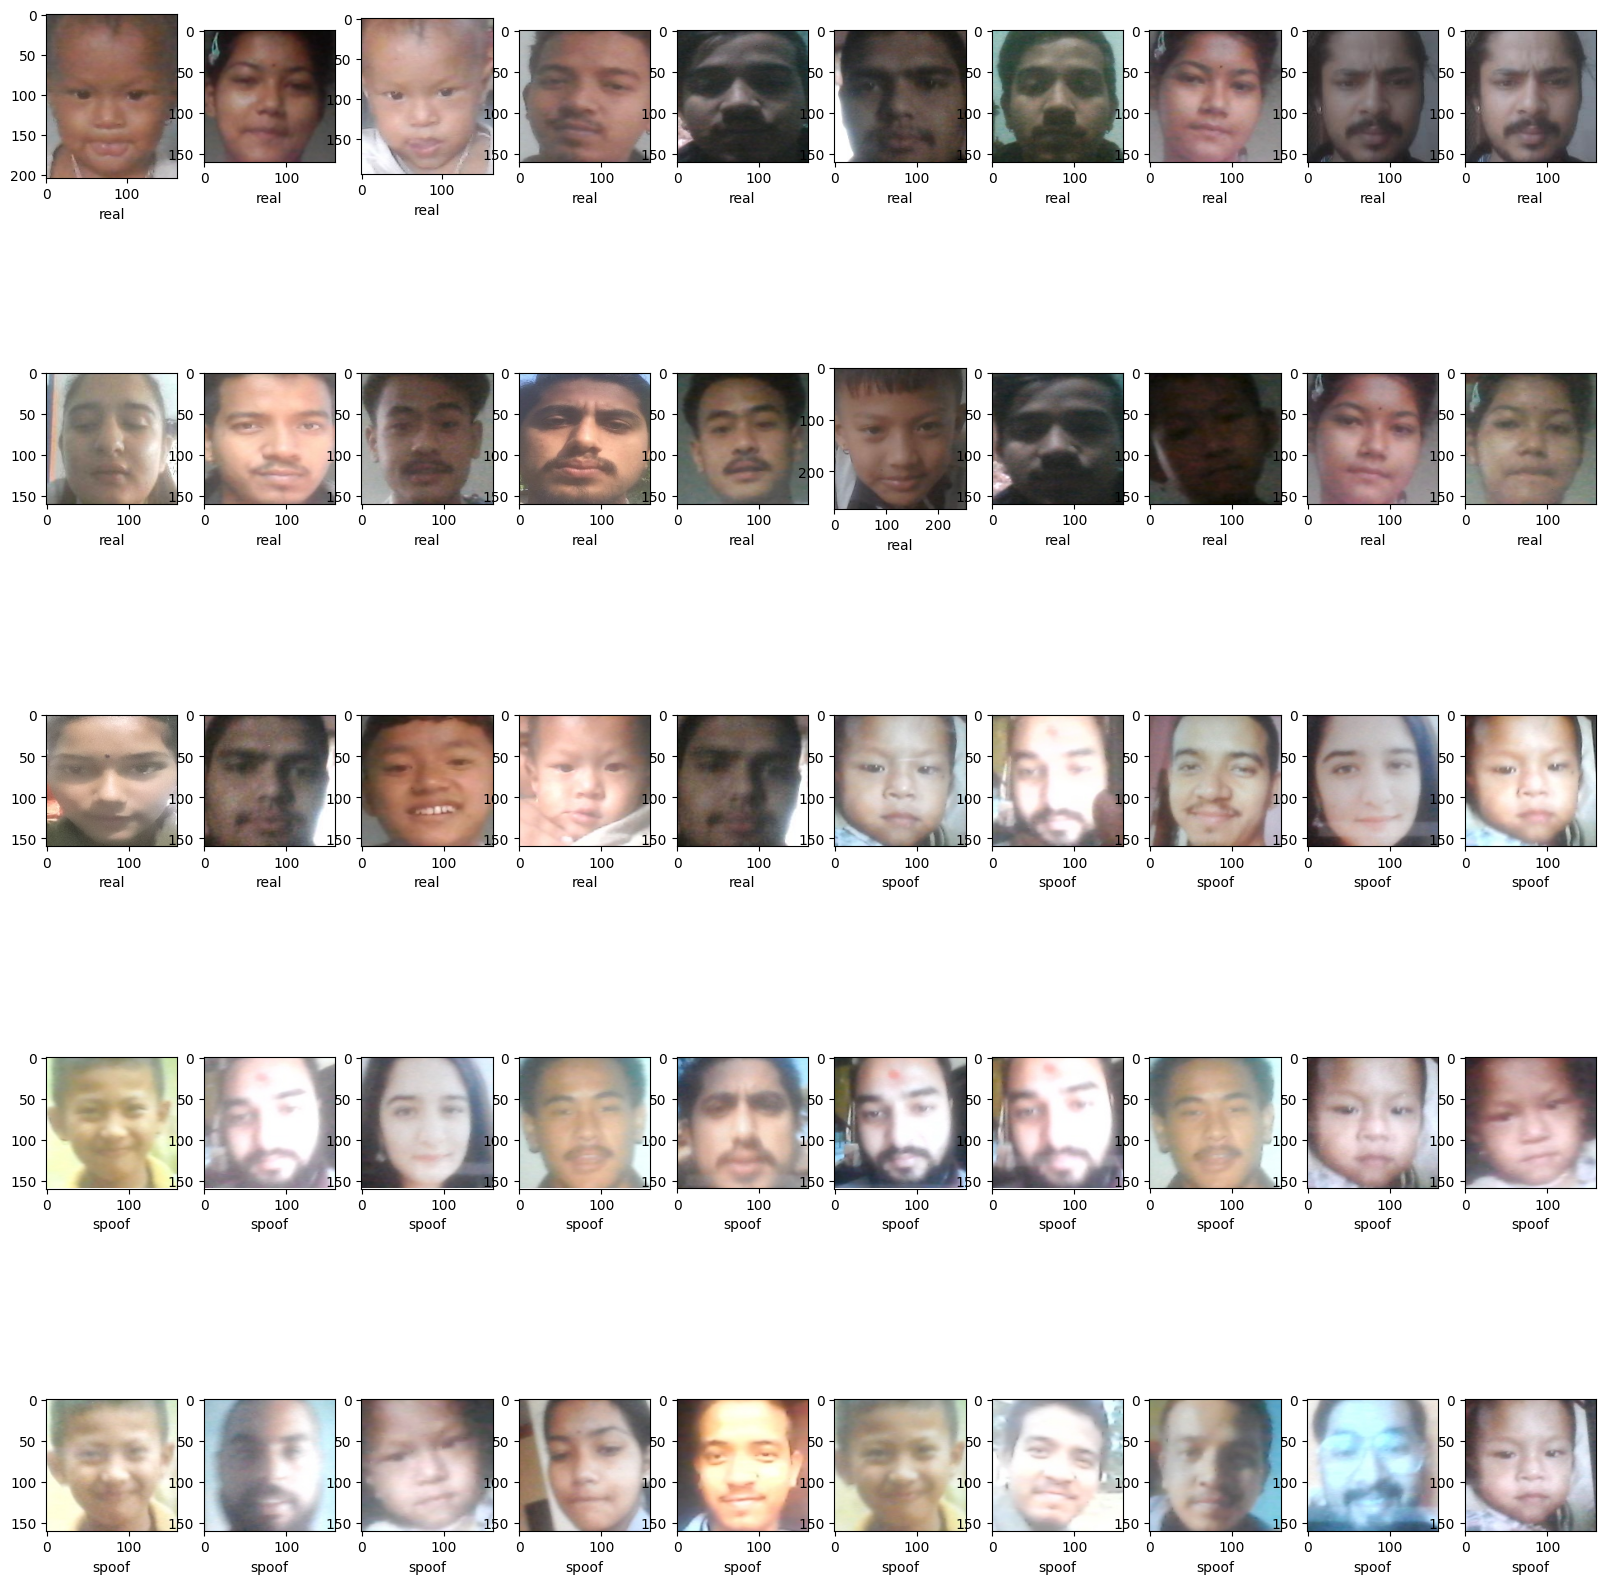

In [19]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

In [22]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

In [23]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 4220 images belonging to 2 classes.


In [25]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 951 images belonging to 2 classes.


In [26]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

<ipython-input-26-2c3523f13258>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
mobilenet.trainable = False

In [28]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [29]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,514,001 (9.59 MB)

 Trainable params: 256,017 (1000.07 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [30]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [31]:
import os
os.mkdir('/content/model_weights/')

In [38]:
model_checkpoint = ModelCheckpoint('./model_weights/face_liveness{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [40]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks=[model_checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 160, 160, 3))
  warnings.warn(msg)


168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.5317 - loss: 0.9458
Epoch 1: val_loss improved from inf to 0.69339, saving model to ./model_weights/face_liveness01-0.597895.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 93s 521ms/step - accuracy: 0.5317 - loss: 0.9456 - val_accuracy: 0.5979 - val_loss: 0.6934
Epoch 2/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 45s 272ms/step - accuracy: 0.6800 - loss: 0.6978

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.69339 to 0.69240, saving model to ./model_weights/face_liveness02-0.598947.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.6800 - loss: 0.6978 - val_accuracy: 0.5989 - val_loss: 0.6924
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5514 - loss: 0.8316
Epoch 3: val_loss improved from 0.69240 to 0.65282, saving model to ./model_weights/face_liveness03-0.641053.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 86s 510ms/step - accuracy: 0.5514 - loss: 0.8314 - val_accuracy: 0.6411 - val_loss: 0.6528
Epoch 4/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 45s 272ms/step - accuracy: 0.6000 - loss: 0.6851
Epoch 4: val_loss improved from 0.65282 to 0.65257, saving model to ./model_weights/face_liveness04-0.642105.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.6000 - loss: 0.6851 - val_accuracy: 0.6421 - val_loss: 0.6526
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.5725 - loss: 0.7447
Epoch 5: val_loss improved from 0.65257 to 0.62644, saving model to ./model_weights/face_liveness05-0.678947.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 122s 511ms/step - accuracy: 0.5725 - loss: 0.7446 - val_accuracy: 0.6789 - val_loss: 0.6264
Epoch 6/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:17 466ms/step - accuracy: 0.6800 - loss: 0.5789
Epoch 6: val_loss did not improve from 0.62644
168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.6800 - loss: 0.5789 - val_accuracy: 0.6779 - val_loss: 0.6265
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6004 - loss: 0.7102
Epoch 7: val_loss improved from 0.62644 to 0.60725, saving model to ./model_weights/face_liveness07-0.684211.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 634ms/step - accuracy: 0.6005 - loss: 0.7101 - val_accuracy: 0.6842 - val_loss: 0.6073
Epoch 8/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:28 528ms/step - accuracy: 0.6000 - loss: 0.7363
Epoch 8: val_loss improved from 0.60725 to 0.60687, saving model to ./model_weights/face_liveness08-0.684211.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.6000 - loss: 0.7363 - val_accuracy: 0.6842 - val_loss: 0.6069
Epoch 9/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6245 - loss: 0.6771
Epoch 9: val_loss improved from 0.60687 to 0.58515, saving model to ./model_weights/face_liveness09-0.711579.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 844ms/step - accuracy: 0.6246 - loss: 0.6770 - val_accuracy: 0.7116 - val_loss: 0.5851
Epoch 10/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 47s 286ms/step - accuracy: 0.6800 - loss: 0.5817
Epoch 10: val_loss did not improve from 0.58515
168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.6800 - loss: 0.5817 - val_accuracy: 0.7105 - val_loss: 0.5852
Epoch 11/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6599 - loss: 0.6348
Epoch 11: val_loss improved from 0.58515 to 0.56411, saving model to ./model_weights/face_liveness11-0.707368.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 86s 514ms/step - accuracy: 0.6599 - loss: 0.6348 - val_accuracy: 0.7074 - val_loss: 0.5641
Epoch 12/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.7200 - loss: 0.6194
Epoch 12: val_loss improved from 0.56411 to 0.56325, saving model to ./model_weights/face_liveness12-0.708421.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.7200 - loss: 0.6194 - val_accuracy: 0.7084 - val_loss: 0.5633
Epoch 13/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6878 - loss: 0.6023
Epoch 13: val_loss improved from 0.56325 to 0.53790, saving model to ./model_weights/face_liveness13-0.732632.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 81s 482ms/step - accuracy: 0.6878 - loss: 0.6023 - val_accuracy: 0.7326 - val_loss: 0.5379
Epoch 14/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.6800 - loss: 0.6133
Epoch 14: val_loss did not improve from 0.53790
168/168 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.6800 - loss: 0.6133 - val_accuracy: 0.7326 - val_loss: 0.5379
Epoch 15/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.7095 - loss: 0.5856
Epoch 15: val_loss improved from 0.53790 to 0.51257, saving model to ./model_weights/face_liveness15-0.746316.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 608ms/step - accuracy: 0.7096 - loss: 0.5855 - val_accuracy: 0.7463 - val_loss: 0.5126
Epoch 16/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 45s 275ms/step - accuracy: 0.7600 - loss: 0.6028
Epoch 16: val_loss did not improve from 0.51257
168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.7600 - loss: 0.6028 - val_accuracy: 0.7474 - val_loss: 0.5127
Epoch 17/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7250 - loss: 0.5560
Epoch 17: val_loss improved from 0.51257 to 0.49104, saving model to ./model_weights/face_liveness17-0.758947.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 730ms/step - accuracy: 0.7250 - loss: 0.5560 - val_accuracy: 0.7589 - val_loss: 0.4910
Epoch 18/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 46s 276ms/step - accuracy: 0.6800 - loss: 0.5615
Epoch 18: val_loss improved from 0.49104 to 0.49097, saving model to ./model_weights/face_liveness18-0.758947.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.6800 - loss: 0.5615 - val_accuracy: 0.7589 - val_loss: 0.4910
Epoch 19/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.7401 - loss: 0.5339
Epoch 19: val_loss improved from 0.49097 to 0.46214, saving model to ./model_weights/face_liveness19-0.786316.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 805ms/step - accuracy: 0.7402 - loss: 0.5339 - val_accuracy: 0.7863 - val_loss: 0.4621
Epoch 20/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 46s 279ms/step - accuracy: 0.7600 - loss: 0.6070
Epoch 20: val_loss improved from 0.46214 to 0.46198, saving model to ./model_weights/face_liveness20-0.786316.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.7600 - loss: 0.6070 - val_accuracy: 0.7863 - val_loss: 0.4620
Epoch 21/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7697 - loss: 0.4951
Epoch 21: val_loss improved from 0.46198 to 0.44183, saving model to ./model_weights/face_liveness21-0.802105.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 204s 887ms/step - accuracy: 0.7697 - loss: 0.4951 - val_accuracy: 0.8021 - val_loss: 0.4418
Epoch 22/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 56s 339ms/step - accuracy: 0.8000 - loss: 0.3516
Epoch 22: val_loss did not improve from 0.44183
168/168 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.8000 - loss: 0.3516 - val_accuracy: 0.8021 - val_loss: 0.4420
Epoch 23/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.7630 - loss: 0.4998
Epoch 23: val_loss improved from 0.44183 to 0.42081, saving model to ./model_weights/face_liveness23-0.812632.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 135s 567ms/step - accuracy: 0.7630 - loss: 0.4997 - val_accuracy: 0.8126 - val_loss: 0.4208
Epoch 24/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 48s 292ms/step - accuracy: 0.8400 - loss: 0.4748
Epoch 24: val_loss improved from 0.42081 to 0.41987, saving model to ./model_weights/face_liveness24-0.813684.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.8400 - loss: 0.4748 - val_accuracy: 0.8137 - val_loss: 0.4199
Epoch 25/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.7835 - loss: 0.4689
Epoch 25: val_loss improved from 0.41987 to 0.40666, saving model to ./model_weights/face_liveness25-0.812632.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 846ms/step - accuracy: 0.7835 - loss: 0.4689 - val_accuracy: 0.8126 - val_loss: 0.4067
Epoch 26/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 44s 264ms/step - accuracy: 0.8400 - loss: 0.3993
Epoch 26: val_loss improved from 0.40666 to 0.40573, saving model to ./model_weights/face_liveness26-0.813684.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.8400 - loss: 0.3993 - val_accuracy: 0.8137 - val_loss: 0.4057
Epoch 27/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7964 - loss: 0.4351
Epoch 27: val_loss improved from 0.40573 to 0.38717, saving model to ./model_weights/face_liveness27-0.825263.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 143s 612ms/step - accuracy: 0.7964 - loss: 0.4351 - val_accuracy: 0.8253 - val_loss: 0.3872
Epoch 28/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 50s 300ms/step - accuracy: 1.0000 - loss: 0.1694
Epoch 28: val_loss did not improve from 0.38717
168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 1.0000 - loss: 0.1694 - val_accuracy: 0.8253 - val_loss: 0.3876
Epoch 29/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8137 - loss: 0.4117
Epoch 29: val_loss improved from 0.38717 to 0.37279, saving model to ./model_weights/face_liveness29-0.830526.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 143s 736ms/step - accuracy: 0.8137 - loss: 0.4117 - val_accuracy: 0.8305 - val_loss: 0.3728
Epoch 30/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 57s 347ms/step - accuracy: 0.8400 - loss: 0.3235
Epoch 30: val_loss did not improve from 0.37279
168/168 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8400 - loss: 0.3235 - val_accuracy: 0.8305 - val_loss: 0.3732
Epoch 31/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.8342 - loss: 0.3936
Epoch 31: val_loss improved from 0.37279 to 0.36005, saving model to ./model_weights/face_liveness31-0.837895.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 103s 584ms/step - accuracy: 0.8342 - loss: 0.3937 - val_accuracy: 0.8379 - val_loss: 0.3601
Epoch 32/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 49s 294ms/step - accuracy: 0.9200 - loss: 0.2830
Epoch 32: val_loss did not improve from 0.36005
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.9200 - loss: 0.2830 - val_accuracy: 0.8368 - val_loss: 0.3627
Epoch 33/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.8328 - loss: 0.4070
Epoch 33: val_loss improved from 0.36005 to 0.35447, saving model to ./model_weights/face_liveness33-0.843158.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 663ms/step - accuracy: 0.8328 - loss: 0.4069 - val_accuracy: 0.8432 - val_loss: 0.3545
Epoch 34/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.8000 - loss: 0.3593
Epoch 34: val_loss improved from 0.35447 to 0.35413, saving model to ./model_weights/face_liveness34-0.842105.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.8000 - loss: 0.3593 - val_accuracy: 0.8421 - val_loss: 0.3541
Epoch 35/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.8314 - loss: 0.3853
Epoch 35: val_loss improved from 0.35413 to 0.34720, saving model to ./model_weights/face_liveness35-0.847368.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 104s 515ms/step - accuracy: 0.8314 - loss: 0.3853 - val_accuracy: 0.8474 - val_loss: 0.3472
Epoch 36/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 56s 341ms/step - accuracy: 0.7600 - loss: 0.4289
Epoch 36: val_loss improved from 0.34720 to 0.34575, saving model to ./model_weights/face_liveness36-0.847368.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.7600 - loss: 0.4289 - val_accuracy: 0.8474 - val_loss: 0.3458
Epoch 37/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8466 - loss: 0.3654
Epoch 37: val_loss improved from 0.34575 to 0.33024, saving model to ./model_weights/face_liveness37-0.855789.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 584ms/step - accuracy: 0.8466 - loss: 0.3654 - val_accuracy: 0.8558 - val_loss: 0.3302
Epoch 38/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.7600 - loss: 0.4773
Epoch 38: val_loss improved from 0.33024 to 0.32965, saving model to ./model_weights/face_liveness38-0.856842.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7600 - loss: 0.4773 - val_accuracy: 0.8568 - val_loss: 0.3297
Epoch 39/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.8519 - loss: 0.3528
Epoch 39: val_loss improved from 0.32965 to 0.32297, saving model to ./model_weights/face_liveness39-0.856842.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 81s 481ms/step - accuracy: 0.8518 - loss: 0.3528 - val_accuracy: 0.8568 - val_loss: 0.3230
Epoch 40/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - accuracy: 0.9200 - loss: 0.2612
Epoch 40: val_loss did not improve from 0.32297
168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9200 - loss: 0.2612 - val_accuracy: 0.8568 - val_loss: 0.3234
Epoch 41/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.8639 - loss: 0.3329
Epoch 41: val_loss improved from 0.32297 to 0.31891, saving model to ./model_weights/face_liveness41-0.861053.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 604ms/step - accuracy: 0.8638 - loss: 0.3329 - val_accuracy: 0.8611 - val_loss: 0.3189
Epoch 42/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 46s 277ms/step - accuracy: 0.7600 - loss: 0.4441
Epoch 42: val_loss improved from 0.31891 to 0.31869, saving model to ./model_weights/face_liveness42-0.861053.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7600 - loss: 0.4441 - val_accuracy: 0.8611 - val_loss: 0.3187
Epoch 43/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8629 - loss: 0.3459
Epoch 43: val_loss improved from 0.31869 to 0.30511, saving model to ./model_weights/face_liveness43-0.866316.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 724ms/step - accuracy: 0.8629 - loss: 0.3459 - val_accuracy: 0.8663 - val_loss: 0.3051
Epoch 44/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 46s 278ms/step - accuracy: 0.8800 - loss: 0.3990
Epoch 44: val_loss improved from 0.30511 to 0.30429, saving model to ./model_weights/face_liveness44-0.867368.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.8800 - loss: 0.3990 - val_accuracy: 0.8674 - val_loss: 0.3043
Epoch 45/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8767 - loss: 0.3040
Epoch 45: val_loss did not improve from 0.30429
168/168 ━━━━━━━━━━━━━━━━━━━━ 82s 487ms/step - accuracy: 0.8767 - loss: 0.3041 - val_accuracy: 0.8695 - val_loss: 0.3051
Epoch 46/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 44s 266ms/step - accuracy: 0.7200 - loss: 0.4002
Epoch 46: val_loss did not improve from 0.30429
168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.7200 - loss: 0.4002 - val_accuracy: 0.8695 - val_loss: 0.3052
Epoch 47/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8750 - loss: 0.2970
Epoch 47: val_loss improved from 0.30429 to 0.29533, saving model to ./model_weights/face_liveness47-0.871579.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 83s 492ms/step - accuracy: 0.8750 - loss: 0.2971 - val_accuracy: 0.8716 - val_loss: 0.2953
Epoch 48/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 48s 289ms/step - accuracy: 0.8800 - loss: 0.2601
Epoch 48: val_loss did not improve from 0.29533
168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.8800 - loss: 0.2601 - val_accuracy: 0.8716 - val_loss: 0.2956
Epoch 49/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8777 - loss: 0.2927
Epoch 49: val_loss improved from 0.29533 to 0.28578, saving model to ./model_weights/face_liveness49-0.875789.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 567ms/step - accuracy: 0.8777 - loss: 0.2928 - val_accuracy: 0.8758 - val_loss: 0.2858
Epoch 50/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:13 441ms/step - accuracy: 0.8800 - loss: 0.2409
Epoch 50: val_loss did not improve from 0.28578
168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8800 - loss: 0.2409 - val_accuracy: 0.8758 - val_loss: 0.2860
Epoch 51/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8752 - loss: 0.2963
Epoch 51: val_loss improved from 0.28578 to 0.27961, saving model to ./model_weights/face_liveness51-0.882105.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 143s 645ms/step - accuracy: 0.8753 - loss: 0.2963 - val_accuracy: 0.8821 - val_loss: 0.2796
Epoch 52/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 44s 265ms/step - accuracy: 1.0000 - loss: 0.1447
Epoch 52: val_loss did not improve from 0.27961
168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 1.0000 - loss: 0.1447 - val_accuracy: 0.8821 - val_loss: 0.2797
Epoch 53/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.8629 - loss: 0.3171
Epoch 53: val_loss improved from 0.27961 to 0.26138, saving model to ./model_weights/face_liveness53-0.886316.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 764ms/step - accuracy: 0.8630 - loss: 0.3170 - val_accuracy: 0.8863 - val_loss: 0.2614
Epoch 54/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 46s 277ms/step - accuracy: 0.9600 - loss: 0.1811
Epoch 54: val_loss did not improve from 0.26138
168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.9600 - loss: 0.1811 - val_accuracy: 0.8863 - val_loss: 0.2614
Epoch 55/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.8862 - loss: 0.2669
Epoch 55: val_loss did not improve from 0.26138
168/168 ━━━━━━━━━━━━━━━━━━━━ 143s 536ms/step - accuracy: 0.8861 - loss: 0.2670 - val_accuracy: 0.8874 - val_loss: 0.2620
Epoch 56/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 47s 287ms/step - accuracy: 0.9200 - loss: 0.2599
Epoch 56: val_loss improved from 0.26138 to 0.26135, saving model to ./model_weights/face_liveness56-0.887368.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.9200 - loss: 0.2599 - val_accuracy: 0.8874 - val_loss: 0.2613
Epoch 57/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.8875 - loss: 0.2645
Epoch 57: val_loss did not improve from 0.26135
168/168 ━━━━━━━━━━━━━━━━━━━━ 143s 850ms/step - accuracy: 0.8876 - loss: 0.2645 - val_accuracy: 0.8842 - val_loss: 0.2699
Epoch 58/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:18 472ms/step - accuracy: 0.9200 - loss: 0.1496
Epoch 58: val_loss did not improve from 0.26135
168/168 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.9200 - loss: 0.1496 - val_accuracy: 0.8842 - val_loss: 0.2699
Epoch 59/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.8901 - loss: 0.2755
Epoch 59: val_loss improved from 0.26135 to 0.24709, saving model to ./model_weights/face_liveness59-0.897895.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 600ms/step - accuracy: 0.8901 - loss: 0.2755 - val_accuracy: 0.8979 - val_loss: 0.2471
Epoch 60/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 46s 278ms/step - accuracy: 1.0000 - loss: 0.0509
Epoch 60: val_loss improved from 0.24709 to 0.24684, saving model to ./model_weights/face_liveness60-0.897895.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 1.0000 - loss: 0.0509 - val_accuracy: 0.8979 - val_loss: 0.2468
Epoch 61/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8936 - loss: 0.2713
Epoch 61: val_loss did not improve from 0.24684
168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 725ms/step - accuracy: 0.8936 - loss: 0.2713 - val_accuracy: 0.8958 - val_loss: 0.2529
Epoch 62/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:01 369ms/step - accuracy: 0.8800 - loss: 0.1706
Epoch 62: val_loss did not improve from 0.24684
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8800 - loss: 0.1706 - val_accuracy: 0.8958 - val_loss: 0.2526
Epoch 63/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8957 - loss: 0.2549
Epoch 63: val_loss did not improve from 0.24684
168/168 ━━━━━━━━━━━━━━━━━━━━ 91s 539ms/step - accuracy: 0.8957 - loss: 0.2549 - val_accuracy: 0.8979 - val_loss: 0.2514
Epoch 64/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.8800 - loss: 0.3297
Epoch 64: val

168/168 ━━━━━━━━━━━━━━━━━━━━ 99s 521ms/step - accuracy: 0.8990 - loss: 0.2590 - val_accuracy: 0.9011 - val_loss: 0.2428
Epoch 68/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 56s 340ms/step - accuracy: 0.9200 - loss: 0.2101
Epoch 68: val_loss improved from 0.24275 to 0.24261, saving model to ./model_weights/face_liveness68-0.901053.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.9200 - loss: 0.2101 - val_accuracy: 0.9011 - val_loss: 0.2426
Epoch 69/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8983 - loss: 0.2500
Epoch 69: val_loss improved from 0.24261 to 0.23573, saving model to ./model_weights/face_liveness69-0.903158.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 132s 546ms/step - accuracy: 0.8983 - loss: 0.2499 - val_accuracy: 0.9032 - val_loss: 0.2357
Epoch 70/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 48s 291ms/step - accuracy: 0.9600 - loss: 0.1824
Epoch 70: val_loss improved from 0.23573 to 0.23561, saving model to ./model_weights/face_liveness70-0.903158.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.9600 - loss: 0.1824 - val_accuracy: 0.9032 - val_loss: 0.2356
Epoch 71/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9105 - loss: 0.2233
Epoch 71: val_loss did not improve from 0.23561
168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 841ms/step - accuracy: 0.9105 - loss: 0.2233 - val_accuracy: 0.9021 - val_loss: 0.2403
Epoch 72/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 59s 355ms/step - accuracy: 0.8800 - loss: 0.2170
Epoch 72: val_loss did not improve from 0.23561
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8800 - loss: 0.2170 - val_accuracy: 0.9032 - val_loss: 0.2394
Epoch 73/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9106 - loss: 0.2325
Epoch 73: val_loss improved from 0.23561 to 0.23381, saving model to ./model_weights/face_liveness73-0.903158.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 849ms/step - accuracy: 0.9105 - loss: 0.2325 - val_accuracy: 0.9032 - val_loss: 0.2338
Epoch 74/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 55s 331ms/step - accuracy: 0.8800 - loss: 0.2909
Epoch 74: val_loss improved from 0.23381 to 0.23331, saving model to ./model_weights/face_liveness74-0.903158.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.8800 - loss: 0.2909 - val_accuracy: 0.9032 - val_loss: 0.2333
Epoch 75/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9061 - loss: 0.2476
Epoch 75: val_loss improved from 0.23331 to 0.22109, saving model to ./model_weights/face_liveness75-0.909474.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 564ms/step - accuracy: 0.9061 - loss: 0.2475 - val_accuracy: 0.9095 - val_loss: 0.2211
Epoch 76/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:05 392ms/step - accuracy: 0.8800 - loss: 0.2069
Epoch 76: val_loss improved from 0.22109 to 0.22082, saving model to ./model_weights/face_liveness76-0.909474.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.8800 - loss: 0.2069 - val_accuracy: 0.9095 - val_loss: 0.2208
Epoch 77/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9077 - loss: 0.2184
Epoch 77: val_loss improved from 0.22082 to 0.21765, saving model to ./model_weights/face_liveness77-0.910526.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 847ms/step - accuracy: 0.9077 - loss: 0.2184 - val_accuracy: 0.9105 - val_loss: 0.2177
Epoch 78/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 49s 294ms/step - accuracy: 0.9600 - loss: 0.1470
Epoch 78: val_loss improved from 0.21765 to 0.21655, saving model to ./model_weights/face_liveness78-0.911579.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9600 - loss: 0.1470 - val_accuracy: 0.9116 - val_loss: 0.2165
Epoch 79/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9051 - loss: 0.2253
Epoch 79: val_loss improved from 0.21655 to 0.21296, saving model to ./model_weights/face_liveness79-0.911579.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 502ms/step - accuracy: 0.9052 - loss: 0.2253 - val_accuracy: 0.9116 - val_loss: 0.2130
Epoch 80/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 55s 335ms/step - accuracy: 0.9200 - loss: 0.2605
Epoch 80: val_loss did not improve from 0.21296
168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.9200 - loss: 0.2605 - val_accuracy: 0.9116 - val_loss: 0.2134
Epoch 81/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.9178 - loss: 0.2043
Epoch 81: val_loss improved from 0.21296 to 0.20852, saving model to ./model_weights/face_liveness81-0.912632.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 841ms/step - accuracy: 0.9178 - loss: 0.2044 - val_accuracy: 0.9126 - val_loss: 0.2085
Epoch 82/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 43s 258ms/step - accuracy: 0.9600 - loss: 0.0663
Epoch 82: val_loss improved from 0.20852 to 0.20835, saving model to ./model_weights/face_liveness82-0.912632.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.9600 - loss: 0.0663 - val_accuracy: 0.9126 - val_loss: 0.2083
Epoch 83/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.9158 - loss: 0.2170
Epoch 83: val_loss improved from 0.20835 to 0.20276, saving model to ./model_weights/face_liveness83-0.914737.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 81s 483ms/step - accuracy: 0.9158 - loss: 0.2170 - val_accuracy: 0.9147 - val_loss: 0.2028
Epoch 84/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 50s 303ms/step - accuracy: 0.9600 - loss: 0.1658
Epoch 84: val_loss did not improve from 0.20276
168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9600 - loss: 0.1658 - val_accuracy: 0.9137 - val_loss: 0.2031
Epoch 85/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9159 - loss: 0.2127
Epoch 85: val_loss improved from 0.20276 to 0.19218, saving model to ./model_weights/face_liveness85-0.917895.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 83s 496ms/step - accuracy: 0.9159 - loss: 0.2127 - val_accuracy: 0.9179 - val_loss: 0.1922
Epoch 86/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 42s 252ms/step - accuracy: 0.8800 - loss: 0.1980
Epoch 86: val_loss did not improve from 0.19218
168/168 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.8800 - loss: 0.1980 - val_accuracy: 0.9168 - val_loss: 0.1944
Epoch 87/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9204 - loss: 0.2040
Epoch 87: val_loss did not improve from 0.19218
168/168 ━━━━━━━━━━━━━━━━━━━━ 82s 487ms/step - accuracy: 0.9204 - loss: 0.2041 - val_accuracy: 0.9189 - val_loss: 0.1951
Epoch 88/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.8800 - loss: 0.2625
Epoch 88: val_loss did not improve from 0.19218
168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.8800 - loss: 0.2625 - val_accuracy: 0.9189 - val_loss: 0.1950
Epoch 89/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.9218 - loss: 0.2010
Epoch 89: val_

168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 680ms/step - accuracy: 0.9210 - loss: 0.1980 - val_accuracy: 0.9211 - val_loss: 0.1879
Epoch 92/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 43s 260ms/step - accuracy: 0.8400 - loss: 0.4232
Epoch 92: val_loss improved from 0.18794 to 0.18447, saving model to ./model_weights/face_liveness92-0.922105.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.8400 - loss: 0.4232 - val_accuracy: 0.9221 - val_loss: 0.1845
Epoch 93/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9183 - loss: 0.2082
Epoch 93: val_loss did not improve from 0.18447
168/168 ━━━━━━━━━━━━━━━━━━━━ 98s 493ms/step - accuracy: 0.9183 - loss: 0.2082 - val_accuracy: 0.9147 - val_loss: 0.1979
Epoch 94/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 43s 260ms/step - accuracy: 0.9600 - loss: 0.1680
Epoch 94: val_loss did not improve from 0.18447
168/168 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.9600 - loss: 0.1680 - val_accuracy: 0.9147 - val_loss: 0.1979
Epoch 95/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9269 - loss: 0.1890
Epoch 95: val_loss did not improve from 0.18447
168/168 ━━━━━━━━━━━━━━━━━━━━ 141s 614ms/step - accuracy: 0.9269 - loss: 0.1889 - val_accuracy: 0.9189 - val_loss: 0.1946
Epoch 96/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 45s 270ms/step - accuracy: 0.9600 - loss: 0.1174
Epoch 96: val_

In [41]:
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

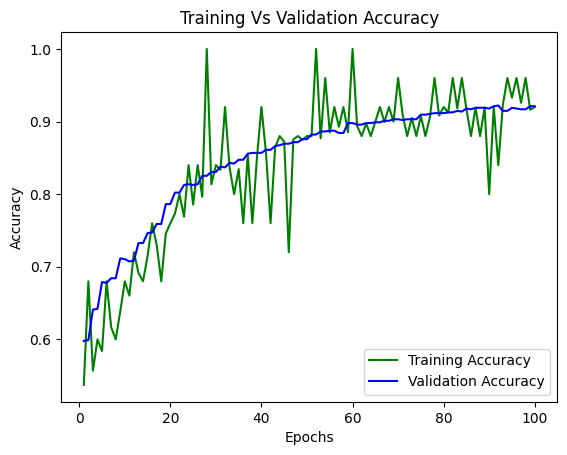

In [42]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


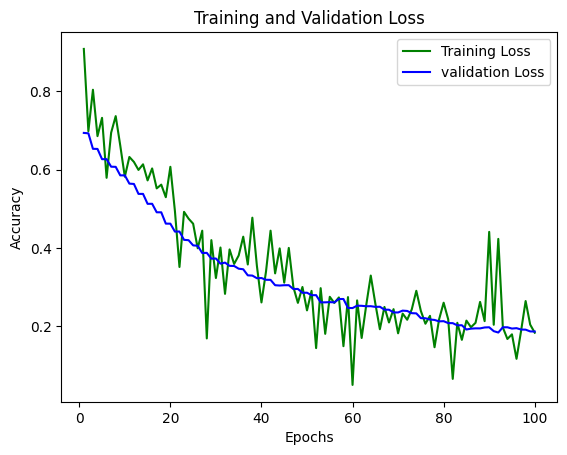

In [43]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [45]:
check_fakes(test_dir,categories[1])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 160, 160, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━

{'real': 71, 'spoof': 403}

In [46]:
check_fakes(test_dir,categories[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

{'real': 473, 'spoof': 4}

In [47]:
(71+4)/(403+71+473+4)*100

7.886435331230284

In [48]:
100-7.8864

92.1136